# PyTorch & MNIST Intro

Let's go through a simple example of Pytorch and MNIST as a way to level set NNs and the use of notebooks.

In [1]:
import torch
import torchvision
import matplotlib.pyplot as pl
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

## Dataset

MNIST is probably the most traditionally used dataset for neural networks, as it is a relatively challenging problem in computer vision: recognizing single-digit numbers from a hand-written digital format. Classically, this dataset takes the form of samples of $28 \times 28$ matrices.

In [2]:
batch_size_train = 64
batch_size_test = 1000

In [3]:
train_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=True, download=True,
                                transform=torchvision.transforms.Compose([
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize((0.1307,), (0.3081,))
                                ])),
    batch_size=batch_size_train,
    shuffle=True)

test_loader = torch.utils.data.DataLoader(
    torchvision.datasets.MNIST('./files/', train=False, download=True,
                                transform=torchvision.transforms.Compose([
                                    torchvision.transforms.ToTensor(),
                                    torchvision.transforms.Normalize(
                                        (0.1307,), (0.3081,))
                                ])),
    batch_size=batch_size_test,
    shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 12890230.52it/s]


Extracting ./files/MNIST/raw/train-images-idx3-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 422605.69it/s]


Extracting ./files/MNIST/raw/train-labels-idx1-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 3858655.50it/s]


Extracting ./files/MNIST/raw/t10k-images-idx3-ubyte.gz to ./files/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 1584902.56it/s]

Extracting ./files/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./files/MNIST/raw



In [4]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

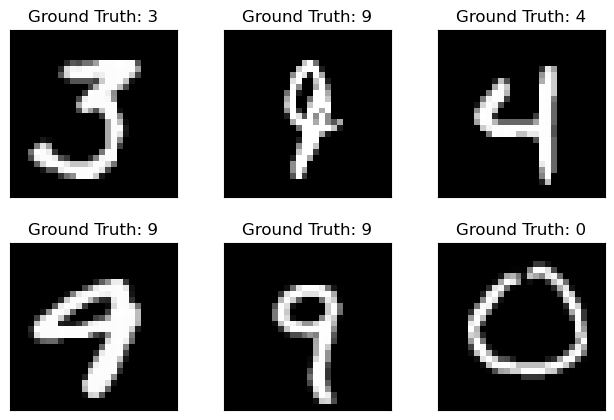

In [5]:
fig = pl.figure()
for i in range(6):
    pl.subplot(2,3,i+1)
    pl.tight_layout()
    pl.imshow(example_data[i][0], cmap='gray', interpolation='none')
    pl.title("Ground Truth: {}".format(example_targets[i]))
    pl.xticks([])
    pl.yticks([])
pl.show()

## Building the model

We need to specify the model through a Python class. Below we show how to create a Feedforward Neural Network model using Pytorch.

In [6]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [7]:
class FeedforwardNeuralNetModel(nn.Module):
    def __init__(self):
        input_dim = 28*28
        num_classes = 10
        super(FeedforwardNeuralNetModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, num_classes) 

    def forward(self, x):
        out = self.fc1(x)
        return F.log_softmax(out)

You'll need to instantiate this class as well as an optimizer, which will apply an algorithm to find the internal parameters of that model, such as matrix weights and biases. As an example, we will use the Stochastic Gradient Descent algorithm.

In [8]:
learning_rate = 0.001
momentum = 0.1
log_interval = 10

In [9]:
network = FeedforwardNeuralNetModel()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

## Training

Next, we will define the training procedure.

In [10]:
n_epochs = 5

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

In [11]:
! mkdir -p results

In [13]:
def train(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # clears gradients
        output = network(data.reshape(-1, 28*28))
        
        loss = F.nll_loss(output, target)
        loss.backward()
        
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item())
            )
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), f'./results/model_iteration-{epoch}.pth')
            torch.save(optimizer.state_dict(), f'./results/optimizer_iteration-{epoch}.pth')

In [14]:
train(1)

/tmp/ipykernel_541/3418281087.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.462653
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.314634
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.172709
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.038150
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.011766
Train Epoch: 1 [3200/60000 (5%)]	Loss: 1.793893
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.784094
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.759681
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.595977
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.612938
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.453784
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.386518
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.438524
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.395226
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.237687
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.228426
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.189160
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.303519
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.156207
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.144378
Train Epoch: 1 [12800/60000 (

<br />
Alongside trainig, we will also monitor the performance of the model on a set of samples not seen during the training.

In [15]:
def test():
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = network(data.reshape(-1, 28*28))
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n' \
          .format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset))
    )

In [16]:
test()

/tmp/ipykernel_541/3418281087.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
/opt/conda/lib/python3.11/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.5596, Accuracy: 8696/10000 (87%)



## Training and evaluating for multiple epochs

Let's train now for all desired epochs.

In [17]:
for epoch in range(2, n_epochs + 1): # starts from the second iteration
  train(epoch)
  test()

/tmp/ipykernel_541/3418281087.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Train Epoch: 2 [0/60000 (0%)]	Loss: 0.666574
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.541077
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.564097
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.666229
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.488056
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.434858
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.543594
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.447622
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.549790
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.652385
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.670172
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.586396
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.554513
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.585009
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.654413
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.667827
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.639856
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.650934
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.545639
Train Epoch: 2 [12160/60000 (20%)]	Loss: 0.532475
Train Epoch: 2 [12800/60000 (

# Model performance

Finally, we can inspect the results.

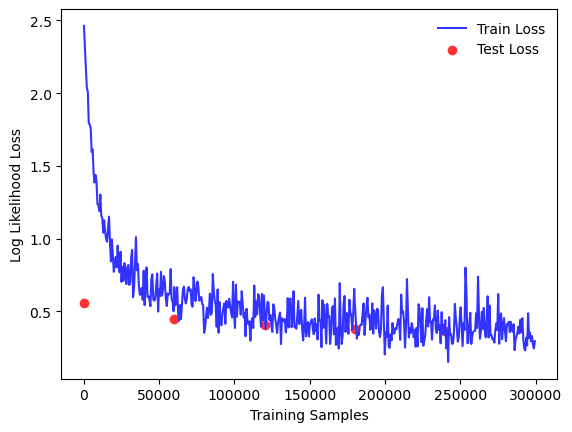

In [18]:
fig = pl.figure()
pl.plot(train_counter, train_losses, color=(0.2, 0.2, 1.0))
pl.scatter(test_counter[:-1], test_losses, color=(1.0, 0.2, 0.2))

pl.legend(['Train Loss', 'Test Loss'], loc='upper right', frameon=False)
pl.xlabel('Training Samples')
pl.ylabel('Log Likelihood Loss')

pl.show()

It's always important to inspect anecdotes to convince yourself the model is behind as expected.

In [19]:
with torch.no_grad():
  output = network(example_data.reshape(1000, 28*28))

/tmp/ipykernel_541/3418281087.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


**Challenge:** Can you explain why we are using `torch.no_grad()`?

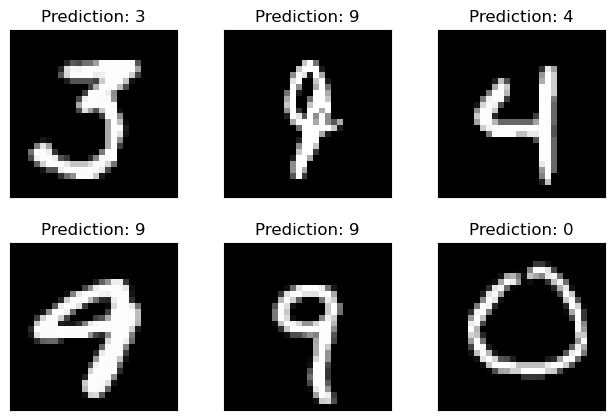

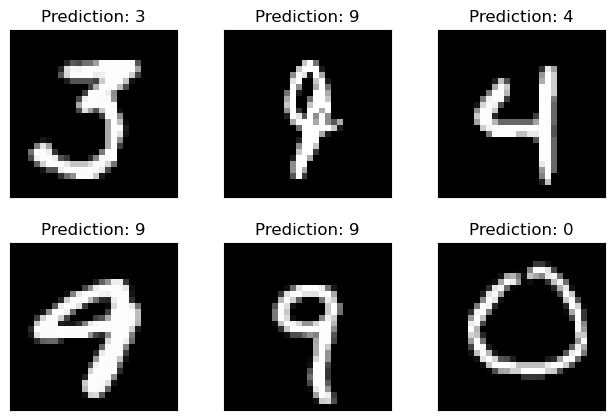

In [20]:
fig = pl.figure()
for i in range(6):
    pl.subplot(2,3,i+1)
    pl.tight_layout()
    pl.imshow(example_data[i][0], cmap='gray', interpolation='none')
    pl.title("Prediction: {}".format(output.data.max(1, keepdim=True)[1][i].item()))
    pl.xticks([])
    pl.yticks([])
fig

**Challenge:** Re-do the plot above, but showcasing only miss-classifications (i.e. cases in which the model did wrong).

## Loading trained models

Eventually, you will want to load the model you trained in the past for either running inference or continue the training procedure. The functions we developed above save artifacts contain all of the metadata and data about the model, assuming you have the right model class. Let's inspect those files: 

In [21]:
! ls results

model_iteration-1.pth  model_iteration-5.pth	  optimizer_iteration-4.pth
model_iteration-2.pth  optimizer_iteration-1.pth  optimizer_iteration-5.pth
model_iteration-3.pth  optimizer_iteration-2.pth
model_iteration-4.pth  optimizer_iteration-3.pth


To load a model:

In [22]:
trained_model = FeedforwardNeuralNetModel()
model_state_dict = torch.load("results/model_iteration-1.pth")
trained_model.load_state_dict(model_state_dict)

<All keys matched successfully>

Before proceeding, let's inspect `model_state_dict`

In [23]:
model_state_dict.keys()

odict_keys(['fc1.weight', 'fc1.bias'])

In [24]:
model_state_dict['fc1.weight'].shape

torch.Size([10, 784])

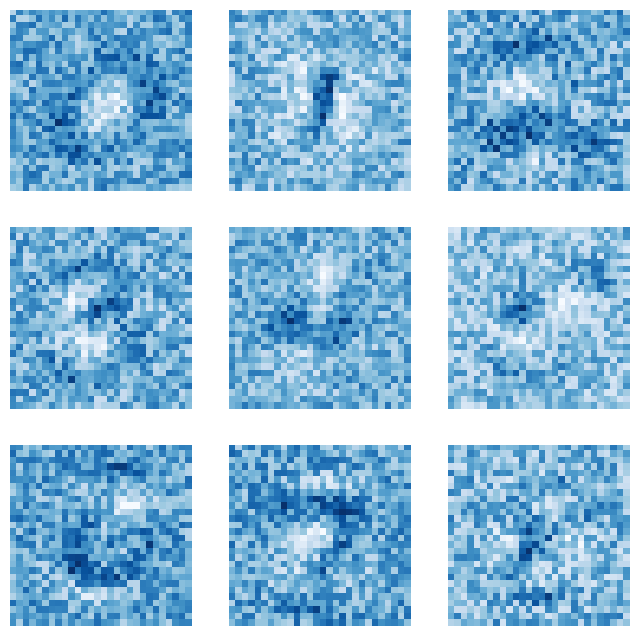

In [25]:
f,axs = pl.subplots(3,3, figsize=(8,8))

c = 0
for ax in axs:
    for sax in ax:
        sax.imshow(model_state_dict['fc1.weight'][c].reshape((28,28)), 
                   cmap = pl.get_cmap('Blues'))
        c += 1
        sax.axis('off')

pl.show()

Let's do the same for the optimizer

In [26]:
optimizer = optim.SGD(trained_model.parameters(), lr=learning_rate, momentum=momentum)
optimizer_state_dict = torch.load("results/optimizer_iteration-3.pth")
optimizer.load_state_dict(optimizer_state_dict)

In [27]:
optimizer_state_dict.keys()

dict_keys(['state', 'param_groups'])

**Challenge:** Can you make sense of the data in this dictionary?

## Final challenges

* What happens if you use only 10% of the available training data? Plot the difference in performance of the network.
* What happens if you remove 80% of all samples with label 5. Do you see a difference in performance? Is this difference homogeneous?
* What happens if you change parameters like the learnign rate and momentum? Plot the difference.
* Can you add more layers to this neural network? Start with one additional layer (often called "hidden layer"). What changes can you observe in doing so?
* Can you add regularization to this model? Look for L1, L2, and drop-out regularizations. What changes do you observe?
* [stretch] Can you change this model and turn it into a convolutional neural network?

What happens if you use only 10% of the available training data? Plot the difference in performance of the network.

In [70]:
network = FeedforwardNeuralNetModel()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

n_epochs = 5
num_batches = int(len(train_loader) * 0.1)

train_losses = []
train_counter = []
test_losses = []
test_counter = [i*num_batches * batch_size_train for i in range(n_epochs + 1)]

def train_10_percent(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        if batch_idx >= num_batches:
            break
        
        optimizer.zero_grad() # clears gradients
        output = network(data.reshape(-1, 28*28))
        
        loss = F.nll_loss(output, target)
        loss.backward()
        
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), num_batches * batch_size_train,
                100. * batch_idx / num_samples, loss.item())
            )
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*num_batches * batch_size_train))
            torch.save(network.state_dict(), f'./results/model_10p_iteration-{epoch}.pth')
            torch.save(optimizer.state_dict(), f'./results/optimizer_10p_iteration-{epoch}.pth')

In [68]:
for epoch in range(1, n_epochs + 1): # starts from the second iteration
  train_10_percent(epoch)
  test()

/tmp/ipykernel_541/3418281087.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Train Epoch: 1 [0/5952 (0%)]	Loss: 2.241298
Train Epoch: 1 [640/5952 (11%)]	Loss: 2.254425
Train Epoch: 1 [1280/5952 (22%)]	Loss: 2.057339
Train Epoch: 1 [1920/5952 (32%)]	Loss: 2.011028
Train Epoch: 1 [2560/5952 (43%)]	Loss: 1.908515
Train Epoch: 1 [3200/5952 (54%)]	Loss: 1.711453
Train Epoch: 1 [3840/5952 (65%)]	Loss: 1.710773
Train Epoch: 1 [4480/5952 (75%)]	Loss: 1.650864
Train Epoch: 1 [5120/5952 (86%)]	Loss: 1.525102
Train Epoch: 1 [5760/5952 (97%)]	Loss: 1.617610

Test set: Avg. loss: 1.5003, Accuracy: 6413/10000 (64%)

Train Epoch: 2 [0/5952 (0%)]	Loss: 1.539666
Train Epoch: 2 [640/5952 (11%)]	Loss: 1.558367
Train Epoch: 2 [1280/5952 (22%)]	Loss: 1.299700
Train Epoch: 2 [1920/5952 (32%)]	Loss: 1.348089
Train Epoch: 2 [2560/5952 (43%)]	Loss: 1.362745
Train Epoch: 2 [3200/5952 (54%)]	Loss: 1.324070
Train Epoch: 2 [3840/5952 (65%)]	Loss: 1.192296
Train Epoch: 2 [4480/5952 (75%)]	Loss: 1.389082
Train Epoch: 2 [5120/5952 (86%)]	Loss: 1.249126
Train Epoch: 2 [5760/5952 (97%)]	Loss: 1

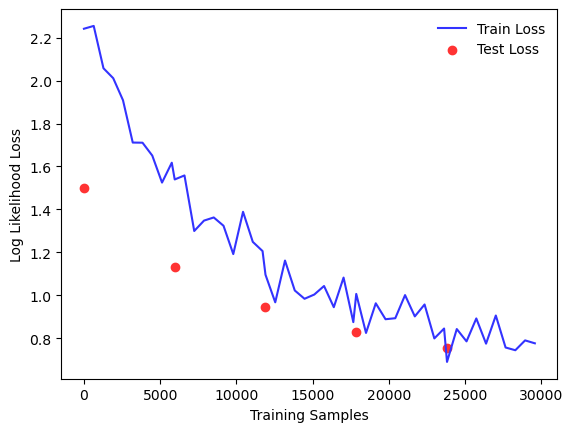

In [69]:
fig = pl.figure()
pl.plot(train_counter, train_losses, color=(0.2, 0.2, 1.0))
pl.scatter(test_counter[:-1], test_losses, color=(1.0, 0.2, 0.2))

pl.legend(['Train Loss', 'Test Loss'], loc='upper right', frameon=False)
pl.xlabel('Training Samples')
pl.ylabel('Log Likelihood Loss')

pl.show()

What happens if you remove 80% of all samples with label 5. Do you see a difference in performance? Is this difference homogeneous?

What happens if you change parameters like the learning rate and momentum? Plot the difference.

In [73]:
learning_rates = [0.001, 0.01, 0.1] 
momentum = 0.1

n_epochs = 5

final_training_losses = []
final_test_losses = []

for learning_rate in learning_rates:
    train_losses = []
    train_counter = []
    test_losses = []
    test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]
    
    network = FeedforwardNeuralNetModel()
    optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

    print(f'LEARNING RATE = {learning_rate}')
    for epoch in range(1, n_epochs + 1):
      train(epoch)
      test()

    final_training_losses.append(tuple(train_counter, train_losses))

LEARNING RATE = 0.0001
Train Epoch: 1 [0/60000 (0%)]	Loss: 2.580386


/tmp/ipykernel_541/3418281087.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Train Epoch: 1 [640/60000 (1%)]	Loss: 2.538870
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.527746
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.470523
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.273995
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.485190
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.373916
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.587106
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.334021
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.359747
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.377493
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.353670
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.388405
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.397190
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.348419
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.330742
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.211714
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.288861
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.254961
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.208167
Train Epoch: 1 [12800/60000 (21%)]	Loss: 2.219016
Train Epoch: 1 [13440/60

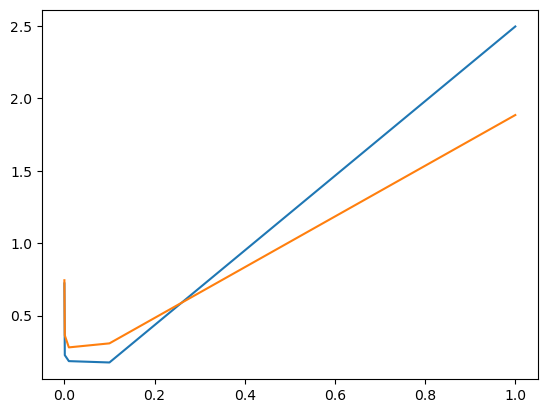

In [76]:
pl.plot(learning_rates, final_training_losses)
pl.plot(learning_rates, final_test_losses)

Can you add more layers to this neural network? Start with one additional layer (often called "hidden layer"). What changes can you observe in doing so?

In [84]:
class FeedforwardNeuralNetModelHiddenLayer(nn.Module):
    def __init__(self):
        input_dim = 28*28
        num_classes = 10
        hidden_dim = 500
        
        super(FeedforwardNeuralNetModelHiddenLayer, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.sigmoid(out)
        out = self.fc2(out)
        
        return F.log_softmax(out)

In [85]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

learning_rate = 0.001
momentum = 0.1

network = FeedforwardNeuralNetModelHiddenLayer()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(1, n_epochs + 1):
    train(epoch)
    test()

/tmp/ipykernel_541/183067187.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.297284
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.365005
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.352196
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.321726
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.283399
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.286144
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.245704
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.282387
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.278284
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.278470
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.253295
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.259172
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.274315
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.244242
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.239889
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.226346
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.258020
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.246851
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.255522
Train Epoch: 1 [12160/60000 (20%)]	Loss: 2.234203
Train Epoch: 1 [12800/60000 (

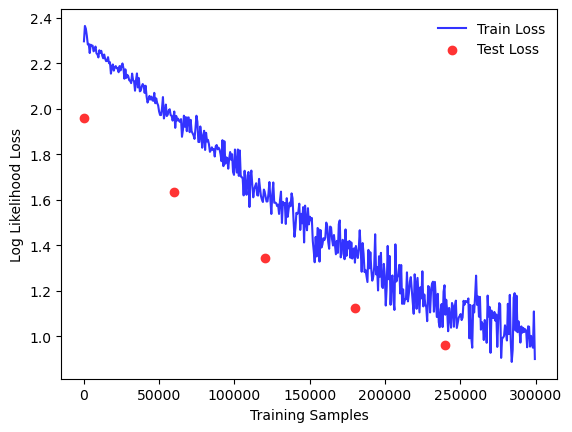

In [86]:
fig = pl.figure()
pl.plot(train_counter, train_losses, color=(0.2, 0.2, 1.0))
pl.scatter(test_counter[:-1], test_losses, color=(1.0, 0.2, 0.2))

pl.legend(['Train Loss', 'Test Loss'], loc='upper right', frameon=False)
pl.xlabel('Training Samples')
pl.ylabel('Log Likelihood Loss')

pl.show()

Can you add regularization to this model? Look for L1, L2, and drop-out regularizations. What changes do you observe?

In [91]:
def train_l1(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # clears gradients
        output = network(data.reshape(-1, 28*28))
        
        loss = F.nll_loss(output, target)
        
        l1_norm = 0
        lambda_l1 = 0.01
        for param in network.parameters():
            l1_norm += torch.sum(torch.abs(param))
        loss += lambda_l1 * l1_norm
        
        loss.backward()
        
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item())
            )
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), f'./results/model_iteration-{epoch}.pth')
            torch.save(optimizer.state_dict(), f'./results/optimizer_iteration-{epoch}.pth')

In [92]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

learning_rate = 0.001
momentum = 0.1

network = FeedforwardNeuralNetModel()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(1, n_epochs + 1):
    train_l1(epoch)
    test()

/tmp/ipykernel_541/3418281087.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.671032
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.558475
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.194093
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.158836
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.180473
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.143137
Train Epoch: 1 [3840/60000 (6%)]	Loss: 1.937731
Train Epoch: 1 [4480/60000 (7%)]	Loss: 1.941482
Train Epoch: 1 [5120/60000 (9%)]	Loss: 1.819193
Train Epoch: 1 [5760/60000 (10%)]	Loss: 1.745513
Train Epoch: 1 [6400/60000 (11%)]	Loss: 1.661107
Train Epoch: 1 [7040/60000 (12%)]	Loss: 1.562575
Train Epoch: 1 [7680/60000 (13%)]	Loss: 1.681033
Train Epoch: 1 [8320/60000 (14%)]	Loss: 1.534035
Train Epoch: 1 [8960/60000 (15%)]	Loss: 1.486841
Train Epoch: 1 [9600/60000 (16%)]	Loss: 1.404200
Train Epoch: 1 [10240/60000 (17%)]	Loss: 1.471642
Train Epoch: 1 [10880/60000 (18%)]	Loss: 1.378803
Train Epoch: 1 [11520/60000 (19%)]	Loss: 1.395507
Train Epoch: 1 [12160/60000 (20%)]	Loss: 1.269299
Train Epoch: 1 [12800/60000 (

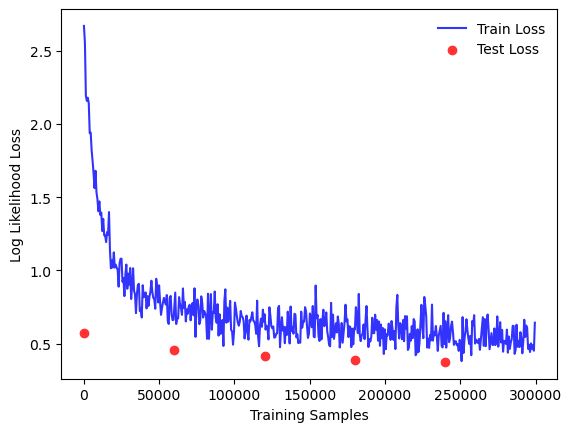

In [93]:
fig = pl.figure()
pl.plot(train_counter, train_losses, color=(0.2, 0.2, 1.0))
pl.scatter(test_counter[:-1], test_losses, color=(1.0, 0.2, 0.2))

pl.legend(['Train Loss', 'Test Loss'], loc='upper right', frameon=False)
pl.xlabel('Training Samples')
pl.ylabel('Log Likelihood Loss')

pl.show()

In [ ]:
def train_l2(epoch):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad() # clears gradients
        output = network(data.reshape(-1, 28*28))
        
        loss = F.nll_loss(output, target)
        
        l2_norm = 0
        lambda_l2 = 0.01
        for param in network.parameters():
            l2_norm += torch.sum(torch.square(param))
        loss += lambda_l2 * l1_norm
        
        loss.backward()
        
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item())
            )
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            torch.save(network.state_dict(), f'./results/model_iteration-{epoch}.pth')
            torch.save(optimizer.state_dict(), f'./results/optimizer_iteration-{epoch}.pth')

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

learning_rate = 0.001
momentum = 0.1

network = FeedforwardNeuralNetModel()
optimizer = optim.SGD(network.parameters(), lr=learning_rate, momentum=momentum)

for epoch in range(1, n_epochs + 1):
    train_l1(epoch)
    test()

In [ ]:
fig = pl.figure()
pl.plot(train_counter, train_losses, color=(0.2, 0.2, 1.0))
pl.scatter(test_counter[:-1], test_losses, color=(1.0, 0.2, 0.2))

pl.legend(['Train Loss', 'Test Loss'], loc='upper right', frameon=False)
pl.xlabel('Training Samples')
pl.ylabel('Log Likelihood Loss')

pl.show()